<a href="https://colab.research.google.com/github/vinayakkini101/study-of-toxic-release-inventory/blob/Sumit_Dev/Sumit_Dutta_Project255_Study_of_Toxic_Release_Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CMPE 255: DATA MINING: FALL 2021**

**A PROJECT ON STUDY OF TOXIC RELEASE INVENTORY**

 **NAME: SUMIT DUTTA**




**SID: 015222493**

**Command to mount into Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Listing contents in the current working directory**

In [ ]:
!ls "/content/drive/My Drive/255 Project/basic_data_files.csv"

'/content/drive/My Drive/255 Project/basic_data_files.csv'


**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

**Command to read the csv file (dataset)**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/255 Project/basic_data_files.csv'
                      , sep=',' 
                      , usecols=['YEAR', 'CITY', 'TRI_FACILITY_ID', 'FACILITY_NAME', 'LATITUDE', 'LONGITUDE','ST','FEDERAL_FACILITY',
                                 'INDUSTRY_SECTOR','CHEMICAL','CLEAR_AIR_ACT_CHEMICAL', 'METAL', 'METAL_CATEGORY',
                                 'CARCINOGEN','5.1_FUGITIVE_AIR', '5.2_STACK_AIR','5.3_WATER','5.4_UNDERGROUND','5.5.1_LANDFILLS',
                                  '5.5.4_OTHER_DISPOSAL','ON-SITE_RELEASE_TOTAL','OFF-SITE_RELEASE_TOTAL',
                                 'TOTAL_RELEASES','PROD._WASTE_(8.1_THRU_8.7)','PARENT_COMPANY_NAME'], nrows = 2548769)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,11,12,35,39,40,41,42,45,52,53,74,91,103) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,TRI_FACILITY_ID,FACILITY_NAME,CITY,ST,LATITUDE,LONGITUDE,FEDERAL_FACILITY,INDUSTRY_SECTOR,CHEMICAL,CLEAR_AIR_ACT_CHEMICAL,METAL,METAL_CATEGORY,CARCINOGEN,5.1_FUGITIVE_AIR,5.2_STACK_AIR,5.3_WATER,5.4_UNDERGROUND,5.5.1_LANDFILLS,5.5.4_OTHER_DISPOSAL,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL,TOTAL_RELEASES,PROD._WASTE_(8.1_THRU_8.7),PARENT_COMPANY_NAME
0,2016,46552DCTLT30350,EDCOAT LLC,NEW CARLISLE,IN,41.6934,-86.4552,NO,Fabricated Metals,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,YES,YES,1,NO,0,0,0,0,0,0,0,1170.32,1170.41,1170.32,NaN
1,2016,01950NNSPC3MALC,UNION SPECIALTIES INC,NEWBURYPORT,MA,42.7964,-70.8904,NO,Chemicals,CERTAIN GLYCOL ETHERS,YES,NO,0,NO,1,17,0,0,0,0,18,0,18,18,NaN
2,2016,44691CRGLL1203T,CARGILL ANIMAL NUTRITION,WOOSTER,OH,40.7847,-81.9396,NO,Food,ZINC COMPOUNDS,NO,YES,1,NO,0,0,0,0,0,0,0,0,0,0,CARGILL INC
3,2016,02745CSHNT215DU,ACUSHNET CO BALL PLANT III,NEW BEDFORD,MA,41.7254,-70.9552,NO,Miscellaneous Manufacturing,DIISOCYANATES,YES,NO,0,NO,0,0,0,0,0,0,0,0,0,2297,ACUSHNET HOLDINGS CORP
4,2016,30050CLRXC17LAK,CLOROX PRODUCTS MANUFACTURING CO,FOREST PARK,GA,33.6272,-84.3868,NO,Chemicals,CERTAIN GLYCOL ETHERS,YES,NO,0,NO,5,5,0,0,0,0,10,20,50,260,THE CLOROX CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548764,1993,92704PWRCR2645S,TTM TECHNOLOGIES INC,SANTA ANA,CA,33.7115,-117.922,NO,Computers and Electronic Products,COPPER,NO,YES,1,NO,0,0,0,0,0,0,0,250,500,66818,TTM TECHNOLOGIES INC
2548765,1993,61240KNNCS2266U,KONE INC ESCALATOR DIV,COAL VALLEY,IL,41.4559,-90.3897,NO,Machinery,COPPER,NO,YES,1,NO,0,0,0,0,0,0,0,0,0,1570,"KONE, INC"
2548766,1993,46514THCNT28722,TRUCK ACCESSORIES GROUP INC. DBA CENTURY FIBER...,ELKHART,IN,41.7298,-86.018,NO,Plastics and Rubber,STYRENE,YES,NO,0,YES,2143,8569,0,0,0,0,10712,0,10712,12263,TRUCK ACCESSORIES GROUP INC
2548767,1993,46787HTRSN601HA,DEKKO HEATING TECHNOLOGIES #25,SOUTH WHITLEY,IN,41.0909,-85.6334,NO,Electrical Equipment,ANTIMONY COMPOUNDS,YES,YES,1,NO,0,0,0,0,0,0,0,1114,1114,5066,DEKKO HEATING TECHS


In [ ]:
df.dtypes

YEAR                          object
TRI_FACILITY_ID               object
FACILITY_NAME                 object
CITY                          object
ST                            object
LATITUDE                      object
LONGITUDE                     object
FEDERAL_FACILITY              object
INDUSTRY_SECTOR               object
CHEMICAL                      object
CLEAR_AIR_ACT_CHEMICAL        object
METAL                         object
METAL_CATEGORY                object
CARCINOGEN                    object
5.1_FUGITIVE_AIR              object
5.2_STACK_AIR                 object
5.3_WATER                     object
5.4_UNDERGROUND               object
5.5.1_LANDFILLS               object
5.5.4_OTHER_DISPOSAL          object
ON-SITE_RELEASE_TOTAL         object
OFF-SITE_RELEASE_TOTAL        object
TOTAL_RELEASES                object
PROD._WASTE_(8.1_THRU_8.7)    object
PARENT_COMPANY_NAME           object
dtype: object

**Command to check for values within the column 'YEAR' which are not the expected type (int) i.e. Outliers**

In [ ]:
sum(df['YEAR'].map(type) != int)

237568

**Command to 'group by' a specific attribute type.**

In [ ]:
group_by_carrier = df.groupby(['YEAR'])
group_by_carrier.size()

YEAR
1993     74785
1994     73728
1995     65536
1996     73728
1997     65536
1998     81920
1999     81920
2000     81920
2001     90112
2002     90112
2003     81920
2004     90112
2005     81920
2006     81920
2007     81920
2008     73728
2009     73728
2010     73728
2011    147456
2012    163840
2013    147456
2014    147456
2015    147456
2016    139264
1993      8177
1994      4055
1995     12164
1996      1956
1997     10126
1998      8880
1999      4959
2000     12216
2001      8488
2002      5983
2003     12304
2004      2022
2005      9960
2006      8901
2007      7041
2008     13094
2009      7868
2010      8348
2011     17306
2012      1348
2013     18234
2014     19122
2015     15540
2016     19446
YEAR        30
dtype: int64

**Command to drop the values of 'YEAR' which were not expected. (Noise)**

In [ ]:
df = df.drop(df[df.YEAR == 'YEAR'].index)

In [ ]:
sum(df['YEAR'].map(type) != int)

237538

Command to convert the values into Numeric type.

In [ ]:
#df[793556]
df['YEAR'] = pd.to_numeric(df['YEAR'])

In [ ]:
sum(df['YEAR'].map(type) != int)

0

**Checking for Null values in the dataset**

**The Null Check has been applied to various columns in the dataset to avoid discrepancies.**

In [ ]:
sum(df['YEAR'].isnull()==True)

0

In [ ]:
sum(df['CITY'].isnull()==True)

0

In [ ]:
sum(df['FACILITY_NAME'].isnull()==True)

0

In [ ]:
sum(df['5.1_FUGITIVE_AIR'].isnull()==True)

0

In [ ]:
sum(df['5.2_STACK_AIR'].isnull()==True)

0

In [ ]:
sum(df['5.3_WATER'].isnull()==True)

0

In [ ]:
sum(df['CARCINOGEN'].isnull()==True)

0

In [ ]:
sum(df['METAL'].isnull()==True)

0

In [ ]:
df.isnull().sum()

YEAR                               0
TRI_FACILITY_ID                    0
FACILITY_NAME                      0
CITY                               0
ST                                 0
LATITUDE                        1505
LONGITUDE                       1505
FEDERAL_FACILITY                   0
INDUSTRY_SECTOR                   34
CHEMICAL                           0
CLEAR_AIR_ACT_CHEMICAL             0
METAL                              0
METAL_CATEGORY                     0
CARCINOGEN                         0
5.1_FUGITIVE_AIR                   0
5.2_STACK_AIR                      0
5.3_WATER                          0
5.4_UNDERGROUND                    0
5.5.1_LANDFILLS                    0
5.5.4_OTHER_DISPOSAL               0
ON-SITE_RELEASE_TOTAL              0
OFF-SITE_RELEASE_TOTAL             0
TOTAL_RELEASES                     0
PROD._WASTE_(8.1_THRU_8.7)         0
PARENT_COMPANY_NAME           459821
dtype: int64

In [ ]:
df=df.drop(df[df.PARENT_COMPANY_NAME.isna()==True].index)

In [ ]:
df.isnull().sum()

YEAR                             0
TRI_FACILITY_ID                  0
FACILITY_NAME                    0
CITY                             0
ST                               0
LATITUDE                      1361
LONGITUDE                     1361
FEDERAL_FACILITY                 0
INDUSTRY_SECTOR                 19
CHEMICAL                         0
CLEAR_AIR_ACT_CHEMICAL           0
METAL                            0
METAL_CATEGORY                   0
CARCINOGEN                       0
5.1_FUGITIVE_AIR                 0
5.2_STACK_AIR                    0
5.3_WATER                        0
5.4_UNDERGROUND                  0
5.5.1_LANDFILLS                  0
5.5.4_OTHER_DISPOSAL             0
ON-SITE_RELEASE_TOTAL            0
OFF-SITE_RELEASE_TOTAL           0
TOTAL_RELEASES                   0
PROD._WASTE_(8.1_THRU_8.7)       0
PARENT_COMPANY_NAME              0
dtype: int64

In [ ]:
df=df.drop(df[df.LATITUDE.isna()==True].index)

In [ ]:
df=df.drop(df[df.INDUSTRY_SECTOR.isna()==True].index)

In [ ]:
df.isnull().sum()

YEAR                          0
TRI_FACILITY_ID               0
FACILITY_NAME                 0
CITY                          0
ST                            0
LATITUDE                      0
LONGITUDE                     0
FEDERAL_FACILITY              0
INDUSTRY_SECTOR               0
CHEMICAL                      0
CLEAR_AIR_ACT_CHEMICAL        0
METAL                         0
METAL_CATEGORY                0
CARCINOGEN                    0
5.1_FUGITIVE_AIR              0
5.2_STACK_AIR                 0
5.3_WATER                     0
5.4_UNDERGROUND               0
5.5.1_LANDFILLS               0
5.5.4_OTHER_DISPOSAL          0
ON-SITE_RELEASE_TOTAL         0
OFF-SITE_RELEASE_TOTAL        0
TOTAL_RELEASES                0
PROD._WASTE_(8.1_THRU_8.7)    0
PARENT_COMPANY_NAME           0
dtype: int64

In [ ]:
df.describe()

,YEAR
count,2.087538e+06
mean,2.006369e+03
std,7.012465e+00
min,1.993000e+03
25%,2.000000e+03
50%,2.007000e+03
75%,2.013000e+03
max,2.016000e+03


In [ ]:
df

,YEAR,TRI_FACILITY_ID,FACILITY_NAME,CITY,ST,LATITUDE,LONGITUDE,FEDERAL_FACILITY,INDUSTRY_SECTOR,CHEMICAL,CLEAR_AIR_ACT_CHEMICAL,METAL,METAL_CATEGORY,CARCINOGEN,5.1_FUGITIVE_AIR,5.2_STACK_AIR,5.3_WATER,5.4_UNDERGROUND,5.5.1_LANDFILLS,5.5.4_OTHER_DISPOSAL,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL,TOTAL_RELEASES,PROD._WASTE_(8.1_THRU_8.7),PARENT_COMPANY_NAME
2,2016,44691CRGLL1203T,CARGILL ANIMAL NUTRITION,WOOSTER,OH,40.7847,-81.9396,NO,Food,ZINC COMPOUNDS,NO,YES,1,NO,0,0,0,0,0,0,0,0,0,0,CARGILL INC
3,2016,02745CSHNT215DU,ACUSHNET CO BALL PLANT III,NEW BEDFORD,MA,41.7254,-70.9552,NO,Miscellaneous Manufacturing,DIISOCYANATES,YES,NO,0,NO,0,0,0,0,0,0,0,0,0,2297,ACUSHNET HOLDINGS CORP
4,2016,30050CLRXC17LAK,CLOROX PRODUCTS MANUFACTURING CO,FOREST PARK,GA,33.6272,-84.3868,NO,Chemicals,CERTAIN GLYCOL ETHERS,YES,NO,0,NO,5,5,0,0,0,0,10,20,50,260,THE CLOROX CO
6,2016,48211CDLLC2500E,GENERAL MOTORS GM VA DETROIT-HAMTRAMCK ASSEMB...,DETROIT,MI,42.382,-83.0449,NO,Transportation Equipment,NICKEL COMPOUNDS,YES,YES,1,NO,0,1,0,0,0,0,1,1080,1601,1081,GENERAL MOTORS LLC
7,2016,35064HNNST3812C,HANNA STEEL CORP,FAIRFIELD,AL,33.4975,-86.9114,NO,Fabricated Metals,"1,2,4-TRIMETHYLBENZENE",NO,NO,0,NO,233,222,0,0,0,0,455,28,483,10017,HANNA STEEL CORP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548764,1993,92704PWRCR2645S,TTM TECHNOLOGIES INC,SANTA ANA,CA,33.7115,-117.922,NO,Computers and Electronic Products,COPPER,NO,YES,1,NO,0,0,0,0,0,0,0,250,500,66818,TTM TECHNOLOGIES INC
2548765,1993,61240KNNCS2266U,KONE INC ESCALATOR DIV,COAL VALLEY,IL,41.4559,-90.3897,NO,Machinery,COPPER,NO,YES,1,NO,0,0,0,0,0,0,0,0,0,1570,"KONE, INC"
2548766,1993,46514THCNT28722,TRUCK ACCESSORIES GROUP INC. DBA CENTURY FIBER...,ELKHART,IN,41.7298,-86.018,NO,Plastics and Rubber,STYRENE,YES,NO,0,YES,2143,8569,0,0,0,0,10712,0,10712,12263,TRUCK ACCESSORIES GROUP INC
2548767,1993,46787HTRSN601HA,DEKKO HEATING TECHNOLOGIES #25,SOUTH WHITLEY,IN,41.0909,-85.6334,NO,Electrical Equipment,ANTIMONY COMPOUNDS,YES,YES,1,NO,0,0,0,0,0,0,0,1114,1114,5066,DEKKO HEATING TECHS


**Command to check which value occurs most frequently in the 'Year' column.**

**Using the concept of 'Mode' to derive the most frequently occuring value in a particular column.**

In [ ]:
from scipy import stats

frequent_year, count = stats.mode(df['YEAR'])

Mode_of_year = int(frequent_year) 
print(Mode_of_year)

2014


In [ ]:
group_by_year = df.groupby(['YEAR'])
group_by_year.size()

YEAR
1993     63771
1994     60197
1995     60630
1996     59463
1997     59510
1998     73223
1999     69972
2000     76324
2001     79836
2002     78297
2003     76917
2004     75557
2005     75602
2006     75076
2007     74111
2008     72862
2009     68565
2010     68710
2011    137800
2012    137802
2013    138162
2014    138773
2015    135200
2016    131178
dtype: int64

In [ ]:
#Considering past 10 years
df = df.drop(df[df.YEAR <2007].index)

In [ ]:
group_by_year = df.groupby(['YEAR'])
group_by_year.size()

YEAR
2007     74111
2008     72862
2009     68565
2010     68710
2011    137800
2012    137802
2013    138162
2014    138773
2015    135200
2016    131178
dtype: int64

In [ ]:
df

,YEAR,TRI_FACILITY_ID,FACILITY_NAME,CITY,ST,LATITUDE,LONGITUDE,FEDERAL_FACILITY,INDUSTRY_SECTOR,CHEMICAL,CLEAR_AIR_ACT_CHEMICAL,METAL,METAL_CATEGORY,CARCINOGEN,5.1_FUGITIVE_AIR,5.2_STACK_AIR,5.3_WATER,5.4_UNDERGROUND,5.5.1_LANDFILLS,5.5.4_OTHER_DISPOSAL,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL,TOTAL_RELEASES,PROD._WASTE_(8.1_THRU_8.7),PARENT_COMPANY_NAME
2,2016,44691CRGLL1203T,CARGILL ANIMAL NUTRITION,WOOSTER,OH,40.7847,-81.9396,NO,Food,ZINC COMPOUNDS,NO,YES,1,NO,0,0,0,0,0,0,0,0,0,0,CARGILL INC
3,2016,02745CSHNT215DU,ACUSHNET CO BALL PLANT III,NEW BEDFORD,MA,41.7254,-70.9552,NO,Miscellaneous Manufacturing,DIISOCYANATES,YES,NO,0,NO,0,0,0,0,0,0,0,0,0,2297,ACUSHNET HOLDINGS CORP
4,2016,30050CLRXC17LAK,CLOROX PRODUCTS MANUFACTURING CO,FOREST PARK,GA,33.6272,-84.3868,NO,Chemicals,CERTAIN GLYCOL ETHERS,YES,NO,0,NO,5,5,0,0,0,0,10,20,50,260,THE CLOROX CO
6,2016,48211CDLLC2500E,GENERAL MOTORS GM VA DETROIT-HAMTRAMCK ASSEMB...,DETROIT,MI,42.382,-83.0449,NO,Transportation Equipment,NICKEL COMPOUNDS,YES,YES,1,NO,0,1,0,0,0,0,1,1080,1601,1081,GENERAL MOTORS LLC
7,2016,35064HNNST3812C,HANNA STEEL CORP,FAIRFIELD,AL,33.4975,-86.9114,NO,Fabricated Metals,"1,2,4-TRIMETHYLBENZENE",NO,NO,0,NO,233,222,0,0,0,0,455,28,483,10017,HANNA STEEL CORP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323389,2007,01810RYTHN350LO,RAYTHEON CO,ANDOVER,MA,42.64385,-71.19017,NO,Transportation Equipment,LEAD,YES,YES,1,YES,0,0,0,0,0,0,0,0,0,4875,RAYTHEON CO
1323391,2007,17566BCKCXBOX23,BUCK CO INC,QUARRYVILLE,PA,39.88191,-76.23175,NO,Primary Metals,TRIETHYLAMINE,YES,NO,0,NO,43,18,0,0,0,0,61,0,61,61,DIXON VALVE & COUPLING CO
1323392,2007,22801STRYS500PL,AIRDYE SOLUTIONS LLC,HARRISONBURG,VA,38.39118,-78.90016,NO,Printing,METHANOL,YES,NO,0,NO,60,660,0,0,0,0,720,0,720,90760,AIRDYE HOLDINGS LLC
1323393,2007,03062TRDYN4PITT,AMPHENOL APC INC,NASHUA,NH,42.738005,-71.489815,NO,Computers and Electronic Products,FORMIC ACID,NO,NO,0,NO,5,9.98,0,0,0,0,14.98,0,14.98,2829.02,AMPHENOL CORP


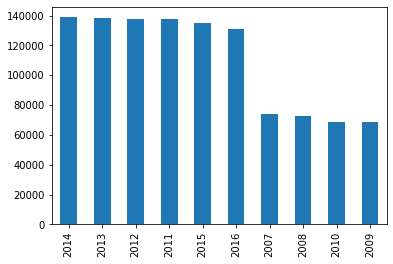

In [ ]:
df.YEAR.value_counts().plot.bar()


**Applying the concept of VISUALIZATION to better understand a particular column (here YEAR) and plot a bar graph for the same.**

In [ ]:
sum(df['LATITUDE'].map(type) == str)


106770

In [ ]:
sum(df['LONGITUDE'].map(type) == str)


106770

In [ ]:
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'])
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'])

In [ ]:
type(df['LATITUDE'][3])

numpy.float64

In [ ]:
sum(df['FACILITY_NAME'].map(type) == str)

1103163

In [ ]:
group_by_year = df.groupby(['CARCINOGEN'])
group_by_year.size()

CARCINOGEN
NO     843006
YES    260157
dtype: int64

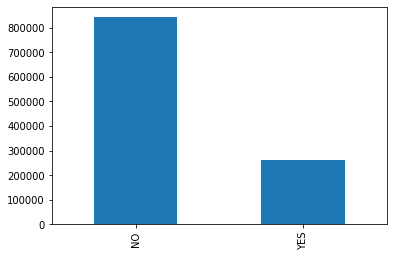

In [ ]:
df.CARCINOGEN.value_counts().plot.bar()

**The graph plot shows comparison of values under 'CARCINOGEN' column in the dataset.**

**It can be seen that this parcitular column has just two values: YES and NO.**

In [ ]:
group_by_carrier = df.groupby(['TRI_FACILITY_ID'])
group_by_carrier.size()

TRI_FACILITY_ID
00602SMRTMRD115      8
00603HWLTTSTATE     30
00603SYMMTLAMNT      3
0060WHPNTRCARR1      4
00610BXTRHROAD4     17
                  ... 
99801KNNCT13401    162
9982WGLCRBPBX14      9
99901LSKSH381TN      8
99901SCSTG1300S     17
99929TRDNT641SH      1
Length: 23717, dtype: int64

In [ ]:
df

,YEAR,TRI_FACILITY_ID,FACILITY_NAME,CITY,ST,LATITUDE,LONGITUDE,FEDERAL_FACILITY,INDUSTRY_SECTOR,CHEMICAL,CLEAR_AIR_ACT_CHEMICAL,METAL,METAL_CATEGORY,CARCINOGEN,5.1_FUGITIVE_AIR,5.2_STACK_AIR,5.3_WATER,5.4_UNDERGROUND,5.5.1_LANDFILLS,5.5.4_OTHER_DISPOSAL,ON-SITE_RELEASE_TOTAL,OFF-SITE_RELEASE_TOTAL,TOTAL_RELEASES,PROD._WASTE_(8.1_THRU_8.7),PARENT_COMPANY_NAME
2,2016,44691CRGLL1203T,CARGILL ANIMAL NUTRITION,WOOSTER,OH,40.784710,-81.939580,NO,Food,ZINC COMPOUNDS,NO,YES,1,NO,0,0,0,0,0,0,0,0,0,0,CARGILL INC
3,2016,02745CSHNT215DU,ACUSHNET CO BALL PLANT III,NEW BEDFORD,MA,41.725430,-70.955170,NO,Miscellaneous Manufacturing,DIISOCYANATES,YES,NO,0,NO,0,0,0,0,0,0,0,0,0,2297,ACUSHNET HOLDINGS CORP
4,2016,30050CLRXC17LAK,CLOROX PRODUCTS MANUFACTURING CO,FOREST PARK,GA,33.627222,-84.386839,NO,Chemicals,CERTAIN GLYCOL ETHERS,YES,NO,0,NO,5,5,0,0,0,0,10,20,50,260,THE CLOROX CO
6,2016,48211CDLLC2500E,GENERAL MOTORS GM VA DETROIT-HAMTRAMCK ASSEMB...,DETROIT,MI,42.381971,-83.044919,NO,Transportation Equipment,NICKEL COMPOUNDS,YES,YES,1,NO,0,1,0,0,0,0,1,1080,1601,1081,GENERAL MOTORS LLC
7,2016,35064HNNST3812C,HANNA STEEL CORP,FAIRFIELD,AL,33.497505,-86.911426,NO,Fabricated Metals,"1,2,4-TRIMETHYLBENZENE",NO,NO,0,NO,233,222,0,0,0,0,455,28,483,10017,HANNA STEEL CORP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323389,2007,01810RYTHN350LO,RAYTHEON CO,ANDOVER,MA,42.643850,-71.190170,NO,Transportation Equipment,LEAD,YES,YES,1,YES,0,0,0,0,0,0,0,0,0,4875,RAYTHEON CO
1323391,2007,17566BCKCXBOX23,BUCK CO INC,QUARRYVILLE,PA,39.881910,-76.231750,NO,Primary Metals,TRIETHYLAMINE,YES,NO,0,NO,43,18,0,0,0,0,61,0,61,61,DIXON VALVE & COUPLING CO
1323392,2007,22801STRYS500PL,AIRDYE SOLUTIONS LLC,HARRISONBURG,VA,38.391180,-78.900160,NO,Printing,METHANOL,YES,NO,0,NO,60,660,0,0,0,0,720,0,720,90760,AIRDYE HOLDINGS LLC
1323393,2007,03062TRDYN4PITT,AMPHENOL APC INC,NASHUA,NH,42.738005,-71.489815,NO,Computers and Electronic Products,FORMIC ACID,NO,NO,0,NO,5,9.98,0,0,0,0,14.98,0,14.98,2829.02,AMPHENOL CORP


In [ ]:
group_by_year = df.groupby(['CITY'])
group_by_year.size()

CITY
ABBEVILLE                  414
ABBOTT PARK                 12
ABERDEEN                   651
ABERDEEN PROVING GROUND     41
ABILENE                    399
                          ... 
ZELLWOOD                    20
ZEPHYRHILLS                 50
ZION                        13
ZUMBROTA                    33
ZWOLLE                      12
Length: 5509, dtype: int64

In [ ]:
bool = {'YES': 1, 'NO': 0}
df['METAL'] = df['METAL'].map(bool)
df['FEDERAL_FACILITY'] = df['FEDERAL_FACILITY'].map(bool)
df['CLEAR_AIR_ACT_CHEMICAL'] = df['CLEAR_AIR_ACT_CHEMICAL'].map(bool)
df['CARCINOGEN'] = df['CARCINOGEN'].map(bool)

In [ ]:
type(df['YEAR'][3])

numpy.int64

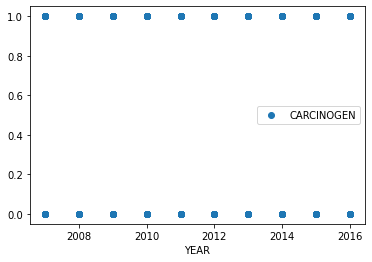

In [ ]:
df.plot(x='YEAR', y='CARCINOGEN', style='o')

**Applying the concept of VISUALIZATION to better understand a column. (Here, Carcinogen).**

In [ ]:
#df.plot(x="YEAR", y=["5.2_STACK_AIR", "5.1_FUGITIVE_AIR"], kind="bar")
type(df['YEAR'][4])

numpy.int64




**PROBLEM STATEMENT: Which facility produces the Most Toxic Release in a particular city?**

**The aim is to address aforementioned question using various Data Mining techniques.**

**Applying the Standard Scaler to scale the data**



**Importing necessary libraries for 'Scaling'**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['YEAR', 'TRI_FACILITY_ID', 'FACILITY_NAME', 'CITY', 'ST', 'LATITUDE',
       'LONGITUDE', 'FEDERAL_FACILITY', 'INDUSTRY_SECTOR', 'CHEMICAL',
       'CLEAR_AIR_ACT_CHEMICAL', 'METAL', 'METAL_CATEGORY', 'CARCINOGEN',
       '5.1_FUGITIVE_AIR', '5.2_STACK_AIR', '5.3_WATER', '5.4_UNDERGROUND',
       '5.5.1_LANDFILLS', '5.5.4_OTHER_DISPOSAL', 'ON-SITE_RELEASE_TOTAL',
       'OFF-SITE_RELEASE_TOTAL', 'TOTAL_RELEASES',
       'PROD._WASTE_(8.1_THRU_8.7)', 'PARENT_COMPANY_NAME'],
      dtype='object')

In [ ]:
new_df = df[[ '5.2_STACK_AIR', '5.1_FUGITIVE_AIR', 'OFF-SITE_RELEASE_TOTAL','ON-SITE_RELEASE_TOTAL', 'TOTAL_RELEASES' ,'PROD._WASTE_(8.1_THRU_8.7)']]
#type(new_df['ON-SITE_RELEASE_TOTAL'][1])

**Plotting "COVARIANCE MATRIX" for a better understanding.**

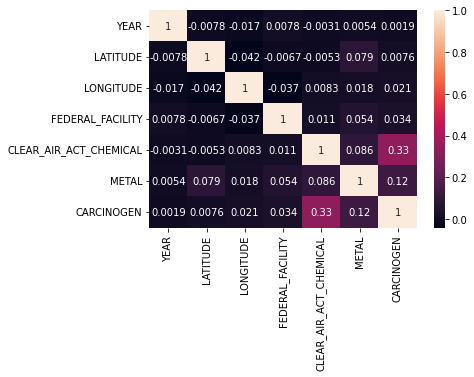

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,annot=True)

**As per the above figure, we can see the Covariance Matrix has been created showing how closely one attribute is related to other in the dataset.**

In [ ]:
standerScaler = StandardScaler()
standerScaler.fit(new_df)
scaled_new_ds = pd.DataFrame(standerScaler.transform(new_df), columns = new_df.columns)
print ("Scaling complete. Features are now scaled.")

Scaling complete. Features are now scaled.


**Standardization PCA: For dimensionality reduction**

**The concept of "PRINCIPAL COMPONENT ANALYSIS" & "DIMENSIONALITY REDUCTION" can prove beneficial for us to determine which facility produces the most toxic release in a particular city.**

**With the help of this Data Mining Technique, we can focus on selected columns instead of all the columns, the ones which most likely leads to release of Toxic chemicals.**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)

In [ ]:
DataPCA = pca.fit_transform(scaled_new_ds)
pca.explained_variance_ratio_.sum()

0.9022869554401405

In [ ]:
pca.n_components_

4

In [ ]:
New_Feature = pd.DataFrame(data=DataPCA, columns = ['pc1', 'pc2',  'pc3', 'pc4'])

In [ ]:
New_Feature.head()

,pc1,pc2,pc3,pc4
0,-0.069064,-0.087704,-0.043062,0.026289
1,-0.068822,-0.087657,-0.043057,0.026274
2,-0.069006,-0.087598,-0.042921,0.026331
3,-0.068220,-0.087755,-0.035418,0.026291
4,-0.067342,-0.082777,-0.042890,0.028320


In [ ]:
pca.explained_variance_ratio_.sum()

0.9022869554401405

**The explained variance indicates how much variance each of the primary components can account for.**

**By maintaining 90% variance in the data, we found that the dimensions can be reduced to 4.**

**Per applying the concepts of normalization and standardization, the significant differences in values as observed earlier were contained.**

In [ ]:
New_Feature

,pc1,pc2,pc3,pc4
0,-0.069064,-0.087704,-0.043062,0.026289
1,-0.068822,-0.087657,-0.043057,0.026274
2,-0.069006,-0.087598,-0.042921,0.026331
3,-0.068220,-0.087755,-0.035418,0.026291
4,-0.067342,-0.082777,-0.042890,0.028320
...,...,...,...,...
1103158,-0.068550,-0.087604,-0.043051,0.026257
1103159,-0.068966,-0.086969,-0.043068,0.026817
1103160,-0.058574,-0.081010,-0.042936,0.022510
1103161,-0.068745,-0.087514,-0.043057,0.026283


In [ ]:
New_Feature['City'] = df['CITY']
New_Feature['Fac_Name'] = df['FACILITY_NAME']
New_Feature.dropna()

,pc1,pc2,pc3,pc4,City,Fac_Name
2,-0.069006,-0.087598,-0.042921,0.026331,WOOSTER,CARGILL ANIMAL NUTRITION
3,-0.068220,-0.087755,-0.035418,0.026291,NEW BEDFORD,ACUSHNET CO BALL PLANT III
4,-0.067342,-0.082777,-0.042890,0.028320,FOREST PARK,CLOROX PRODUCTS MANUFACTURING CO
6,-0.069064,-0.087704,-0.043062,0.026289,DETROIT,GENERAL MOTORS GM VA DETROIT-HAMTRAMCK ASSEMB...
7,-0.067447,-0.087237,-0.043031,0.026057,FAIRFIELD,HANNA STEEL CORP
...,...,...,...,...,...,...
1103154,-0.068102,-0.087507,-0.042053,0.026232,PETERSBURG,FRANK E RATTS GENERATING STAT ION
1103158,-0.068550,-0.087604,-0.043051,0.026257,CINCINNATI,MEYER TOOL INC
1103159,-0.068966,-0.086969,-0.043068,0.026817,GEISMAR,OCCIDENTAL CHEMICAL HOLDING CORP - GEISMAR PLANT
1103160,-0.058574,-0.081010,-0.042936,0.022510,GEISMAR,OCCIDENTAL CHEMICAL HOLDING CORP - GEISMAR PLANT


**It can be seen that two new columns "City" and "Fac_Name" has been created and added to our new dataset from the original dataset.**

**These newly added columns will help us answer our question- Which facility produces the most toxic release in a particular city.**

In [ ]:
New_Feature['City'].value_counts()

HOUSTON            10115
PASADENA            5972
LA PORTE            5622
PORT ARTHUR         5484
LOUISVILLE          5072
                   ...  
RUSHSYLVANIA           1
UNION POINT            1
ORICK                  1
RANCO CUCAMONGA        1
SMITHBURG              1
Name: City, Length: 5277, dtype: int64

In [ ]:
New_Feature['City'].value_counts()[:20]

HOUSTON           10115
PASADENA           5972
LA PORTE           5622
PORT ARTHUR        5484
LOUISVILLE         5072
COLUMBUS           4510
CORPUS CHRISTI     3759
RICHMOND           3687
CLEVELAND          3648
PLAQUEMINE         3642
BAYTOWN            3617
BATON ROUGE        3595
EL DORADO          3586
KANSAS CITY        3550
FREEPORT           3535
DEER PARK          3470
MEMPHIS            3460
INDIANAPOLIS       3226
CARSON             3200
TULSA              3134
Name: City, dtype: int64

**Selecting 20 cities out of the Total cities in total for a better understanding and to perform further operations.**

In [ ]:
Top_Cities = New_Feature['City'].value_counts()[:20].index.tolist()
Top_Cities

['HOUSTON',
 'PASADENA',
 'LA PORTE',
 'PORT ARTHUR',
 'LOUISVILLE',
 'COLUMBUS',
 'CORPUS CHRISTI',
 'RICHMOND',
 'CLEVELAND',
 'PLAQUEMINE',
 'BAYTOWN',
 'BATON ROUGE',
 'EL DORADO',
 'KANSAS CITY',
 'FREEPORT',
 'DEER PARK',
 'MEMPHIS',
 'INDIANAPOLIS',
 'CARSON',
 'TULSA']

In [ ]:
# selecting rows based on specific cities
rslt_df = New_Feature[New_Feature['City'].isin(Top_Cities)]
rslt_df

,pc1,pc2,pc3,pc4,City,Fac_Name
11,-0.068900,-0.087712,-0.041292,0.026289,EL DORADO,CHEMOURS EL DORADO
13,-0.069064,-0.087704,-0.043062,0.026289,LOUISVILLE,BASF CORP
14,-0.067041,-0.082492,-0.036025,0.028433,LOUISVILLE,BASF CORP
65,-0.065655,-0.087040,-0.042991,0.026076,INDIANAPOLIS,SUPERIOR OIL CO INC
66,-0.069047,-0.087701,-0.043042,0.026287,INDIANAPOLIS,SUPERIOR OIL CO INC
...,...,...,...,...,...,...
1103090,-0.069064,-0.087704,-0.043062,0.026289,FREEPORT,DOW CHEMICAL CO FREEPORT FACILITY
1103095,-0.062238,-0.086041,-0.042926,0.025895,BAYTOWN,EXXONMOBIL CHEMICAL CO BAYTOWN OLEFINS PLANT (...
1103117,-0.024789,-0.033091,-0.042915,0.015906,CORPUS CHRISTI,VALERO REFINING TEXAS LP CORPUS CHRISTI EAST P...
1103141,-0.058428,-0.062314,-0.043124,0.041759,LOUISVILLE,CLARIANT CORP 12TH STREET FACILITY


**Selecting only the cities that occured in the "Top cities" list before to perform further operations on.**

In [ ]:
rslt_df['Most Toxic'] = rslt_df['pc1']+rslt_df['pc2']+rslt_df['pc3']+rslt_df['pc4']
rslt_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pc1,pc2,pc3,pc4,City,Fac_Name,Most Toxic
11,-0.068900,-0.087712,-0.041292,0.026289,EL DORADO,CHEMOURS EL DORADO,-0.171615
13,-0.069064,-0.087704,-0.043062,0.026289,LOUISVILLE,BASF CORP,-0.173541
14,-0.067041,-0.082492,-0.036025,0.028433,LOUISVILLE,BASF CORP,-0.157125
65,-0.065655,-0.087040,-0.042991,0.026076,INDIANAPOLIS,SUPERIOR OIL CO INC,-0.169610
66,-0.069047,-0.087701,-0.043042,0.026287,INDIANAPOLIS,SUPERIOR OIL CO INC,-0.173503
...,...,...,...,...,...,...,...
1103090,-0.069064,-0.087704,-0.043062,0.026289,FREEPORT,DOW CHEMICAL CO FREEPORT FACILITY,-0.173541
1103095,-0.062238,-0.086041,-0.042926,0.025895,BAYTOWN,EXXONMOBIL CHEMICAL CO BAYTOWN OLEFINS PLANT (...,-0.165310
1103117,-0.024789,-0.033091,-0.042915,0.015906,CORPUS CHRISTI,VALERO REFINING TEXAS LP CORPUS CHRISTI EAST P...,-0.084889
1103141,-0.058428,-0.062314,-0.043124,0.041759,LOUISVILLE,CLARIANT CORP 12TH STREET FACILITY,-0.122108


**It can be a seen that a new column "Most Toxic" has been created in the dataframe using the columns from the Principal Component Analysis (PCA).**

**This new column will further help us addressing the problem statement- Which factory produces the most Toxic release in a particular city.**

In [ ]:
for city in Top_Cities:
  max_emission = rslt_df[rslt_df['City']==city]['Most Toxic'].max()
  dangerous = (rslt_df[rslt_df["Most Toxic"]==max_emission]["Fac_Name"].values)
  print("The most toxic producing facility in {} is {} ".format(city,dangerous[0]))
  

The most toxic producing facility in HOUSTON is LAMONS GASKET CO 
The most toxic producing facility in PASADENA is LAMONS GASKET CO 
The most toxic producing facility in LA PORTE is LA PORTE_THE DOW CHEMICAL CO 
The most toxic producing facility in PORT ARTHUR is VEOLIA ES TECHNICAL SOLUTIONS LLC PORT ARTHUR FACILITY 
The most toxic producing facility in LOUISVILLE is LOUISVILLE GAS & ELECTRIC CO - CANE RUN STATION 
The most toxic producing facility in COLUMBUS is STEEL DYNAMICS INC FLAT ROLL GROUP COLUMBUS DIV 
The most toxic producing facility in CORPUS CHRISTI is BUCKEYE TEXAS PROCESSING LLC-CORPUS CHRISTI 
The most toxic producing facility in RICHMOND is PHILIP MORRIS USA COMMERCE ROAD SITE 
The most toxic producing facility in CLEVELAND is CHEMICAL SOLVENTS INC--DENISON FACILITY 
The most toxic producing facility in PLAQUEMINE is BLUE CUBE OPERATIONS LLC - PLAQUEMINE SITE 
The most toxic producing facility in BAYTOWN is CHEMICALS INC 
The most toxic producing facility in BATON ROU

**The above code helps us in determining the Facility that produces the most toxic releases in a particular city.**

**The data has been collected for a total of 20 cities.**

**DATA VISUALIZATION**

**PERFORMING VISUALIZATION FOR ATLEAST 5 CITIES FOR BETTER UNDERSTANDING.**


**(Here, COLUMBUS, HOUSTON, KANSAS CITY, BAYTOWN & CARSON)**

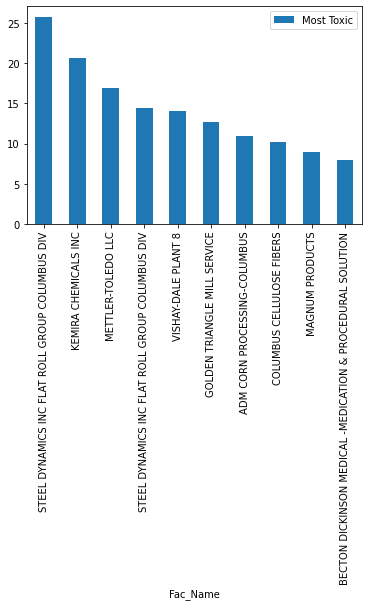

In [ ]:
columbus_df = rslt_df[rslt_df['City']=="COLUMBUS"].nlargest(10,'Most Toxic')
columbus_df.plot(x="Fac_Name", y="Most Toxic",kind='bar')

From the above Graph, it is quite evident that the facility that produces the most toxic releases in "**Columbus**" city is **STEEL DYNAMICS INC FLAT ROLL GROUP COLUMBUS DIV**.

It can also be seen that the facility that produces the least toxic releases in "**Columbus**" city is **BECTON DICKINSON MEDICAL - MEDICATION & PROCEDURAL SOLUTION**.

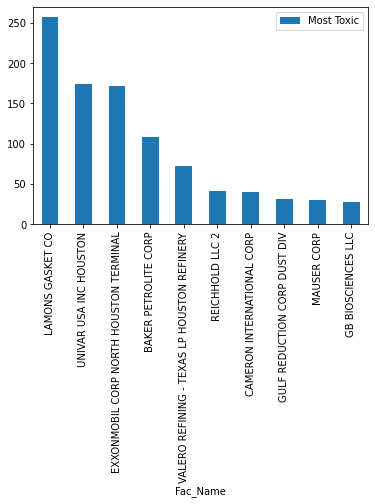

In [ ]:
houston_df = rslt_df[rslt_df['City']=="HOUSTON"].nlargest(10,'Most Toxic')
houston_df.plot(x="Fac_Name", y="Most Toxic",kind='bar')

From the above Graph, it is quite evident that the facility that produces the most toxic releases in "**Houston**" city is **LAMONS GASKET CO**.

It can also be seen that the facility that produces the least toxic releases in "**Houston**" city is **GB BIOSCIENCES LLC**.

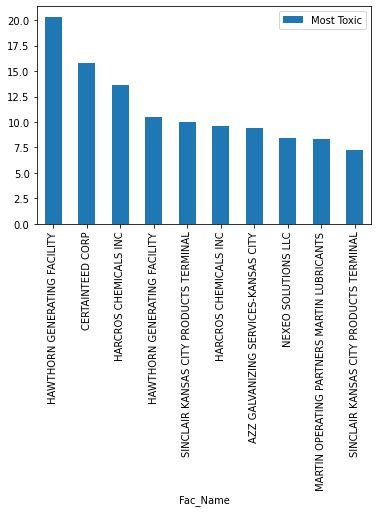

In [ ]:
kansas_df = rslt_df[rslt_df['City']=="KANSAS CITY"].nlargest(10,'Most Toxic')
kansas_df.plot(x="Fac_Name", y="Most Toxic",kind='bar')

From the above Graph, it is quite evident that the facility that produces the most toxic releases in "**Kansas**" city is **HAWTHORN GENERATING FACILITY**.

It can also be seen that the facility that produces the least toxic releases in "**Kansas**" city is **SINCLAIR KANSAS CITY PRODUCTS TERMINAL**.

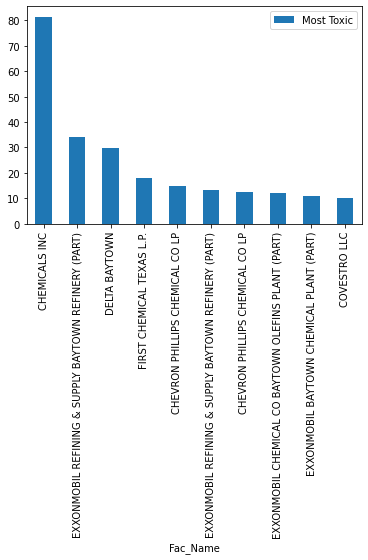

In [ ]:
baytown_df = rslt_df[rslt_df['City']=="BAYTOWN"].nlargest(10,'Most Toxic')
baytown_df.plot(x="Fac_Name", y="Most Toxic",kind='bar')

From the above Graph, it is quite evident that the facility that produces the most toxic releases in "**Baytown**" city is **CHEMICALS INC**.


It can also be seen that the facility that produces the least toxic releases in "**Baytown**" city is **COVESTRO LLC**.

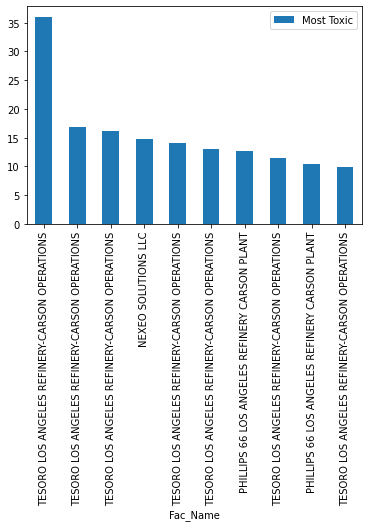

In [ ]:
carson_df = rslt_df[rslt_df['City']=="CARSON"].nlargest(10,'Most Toxic')
carson_df.plot(x="Fac_Name", y="Most Toxic",kind='bar')

From the above Graph, it is quite evident that the facility that produces the most toxic releases in "**Carson**" city is **TESORO LOS ANGELES REFINERY-CARSON OPERATIONS.**



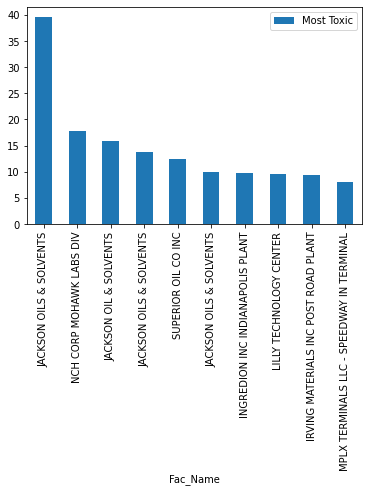

In [ ]:
Indianapolis_df = rslt_df[rslt_df['City']=="INDIANAPOLIS"].nlargest(10,'Most Toxic')
Indianapolis_df.plot(x="Fac_Name", y="Most Toxic",kind='bar')

From the above Graph, it is quite evident that the facility that produces the most toxic releases in "**Indianapolis**" city is **JACKSON OILS & SOLVENTS**.



It can also be seen that the facility that produces the least toxic releases in "**Indianapolis**" city is **MPLX TERMINALS LLC-SPEEDWAY IN TERMINAL**.





**CONCLUSIONS DERIVED**


***   It was seen that using various Data Mining techniques we were able to 
address our Problem Statement: "Which facility produces the Most Toxic Release in a particular city".**

***   Some of the Data Mining techniques used to answer this question is Standardization, Normalization, Visualization, Covariance Matrix, Principal Component Analysis (PCA), Dimensionality Reduction etc.**


***   It was also observed that the concept of VISUALIZATION (Graphs) proved to be extremely beneficial to visualize our data and derive necessary interpretations.**

***   It was also observed that the result shown by graphs matched with the result achieved through applying various operations in the dataset.**
